# Heart Disease Binary Classification

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting the heart disease of an individual based on their medical attributes.

The following approach is to be taken:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> Given clinical parameters about a patient, can the model correctly predict whether or not they have heart disease?

## 2. Data

> Kaggle: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction?resource=download

> This data is sourced from the University of California Irvine's Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

## 3. Evalutation

> The project will be pursued if a 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept.

## 4. Features

### Data Dictionary
a) Age: age of patient

b) Sex: binary classification of male/female (1 or 0 respectively)

c) Chest pain type: 
* 1: Typical angina: chest pain related decrease blood supply to the heart
* 2: Atypical angina: chest pain not related to heart
* 3: Non-anginal pain: typically esophageal spasms (non heart related)
* 4: Asymptomatic: chest pain not showing signs of disease

d) BP: resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

e) Cholesterol: serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
* above 200 is cause for concern

f) FBS over 120: A test that measures blood sugar levels; elevated levels are associated with diabetes and insulin resistance, in which the body cannot properly handle sugar (binary classification, 0 or 1)

g) EKG results: electrocardiographic results
* 0: Nothing to note
* 1: ST-T Wave abnormality
    * can range from mild symptoms to severe problems
* 2: Possible or definite left ventricular hypertrophy 
    * Enlarged heart's main pumping chamber

h) Max HR: maximum heart rate in bpm

i) Exercise Angina: chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood (binary classification, 0 or 1).

j) ST Depression: ST segment depression may be determined by measuring the vertical distance between the patient's trace and the isoelectric line at a location 2-3 millimeters from the QRS complex. It is significant if it is more than 1 mm in V5-V6, or 1.5 mm in AVF or III

k) Slope of ST:
* 1: Upsloping: better heart rate with excercise (uncommon)
* 2: Flatsloping: minimal change (typical healthy heart)
* 3: Downslopins: signs of unhealthy heart

l) Number of vessels fluro: number of major vessels (0-3) colored by flourosopy
* colored vessel means the doctor can see the blood passing through
* the more blood movement the better (no clots)

m) Thallium: thalium stress result
* 1,3: normal
* 6: fixed defect: used to be defect but ok now
* 7: reversable defect: no proper blood movement when excercising

n) Heart Disease: "Presence" or "Absence" 

## Preparing Tools

In [1]:
#regular EDA and plotting modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

#Sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [2]:
df = pd.read_csv("Heart_Disease_Prediction.csv")
df.shape #rows,columns

(270, 14)

## EDA

1. what questions are to be answered?
2. what type of data do we have and how are distinct types to be treated?
3. what is missing from the data and how are missing values to be resolved?
4. what are the outliers and how are they to be resolved?
5. how to add/change/remove features to get more out of the data?

In [3]:
df.head()

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0         7      Presence  
3                        1         7       Absence  
4                        1         3       Absence

In [4]:
df.tail()

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope of ST  \
265     162                0            0.5            1   
266     173                0            0.0            1   
267     153                0            1.3            2   
268     148                0            0.4            2   
269     108                1            1.5            2   

     Number of vessels fluro  Thallium Heart Disease  
265                        0         7       Absence  
266                        0         7       Absence  
267                        0         3       Absence  
268                        0         6       Absence  
269                        3         3      Presence

In [5]:
#number of each classification
df["Heart Disease"].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

Text(0, 0.5, 'Frequency')

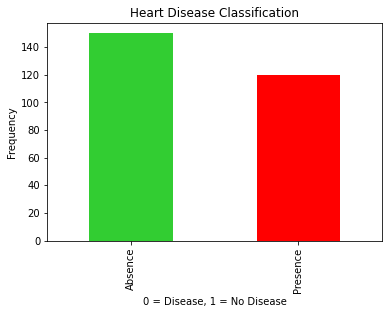

In [6]:
df["Heart Disease"].value_counts().plot(kind="bar", color=["limegreen","red"]);
plt.title("Heart Disease Classification")
plt.xlabel("0 = Disease, 1 = No Disease")
plt.ylabel("Frequency")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [8]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [9]:
#convert target column to int64
df["Heart Disease"] = [1 if status=="Presence" else 0 for status in df["Heart Disease"]]

In [10]:
df.head()

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium  Heart Disease  
0                        3         3              1  
1                        0         7              0  
2                        0         7              1  
3                        1         7              0  
4                        1         3              0

In [11]:
df.describe()

Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906     0.997891   23.165717         0.470952        1.14521   
min        0.000000     0.000000   71.000000         0.000000        0.00000   
25%        0.000000     0.000000  133.000000         0.000000        0.00000   
50%        0.000000     2.000000  153.500000         0.000000        0.80000   
75%        0.000000     2.000000  166.000000         1.000000        1.60000   
max        1.000000     2.000000  202.000000         1.000000        6.20000   

       Slope of ST  Number of vessels fluro    Thallium  Heart Disease  
count   270.000000               270.000000  270.000000     270.000000  
mean      1.585185                 0.670370    4.696296       0.444444  
std       0.614390                 0.943896    1.940659       0.497827  
min       1.000000                 0.000000    3.000000       0.000000  
25%       1.000000                 0.000000    3.000000       0.000000  
50%       2.000000                 0.000000    3.000000       0.000000  
75%       2.000000                 1.000000    7.000000       1.000000  
max       3.000000                 3.000000    7.000000       1.000000

## Sex vs Heart Disease Frequency

In [12]:
df["Sex"].value_counts()

1    183
0     87
Name: Sex, dtype: int64

In [13]:
#illustrate heuristic of predicting heart disease based on sex
pd.crosstab(df["Heart Disease"],df["Sex"])

Sex             0    1
Heart Disease         
0              67   83
1              20  100

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

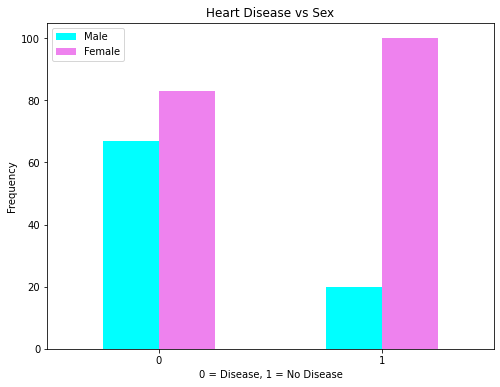

In [14]:
pd.crosstab(df["Heart Disease"],df["Sex"]).plot(kind="bar",
                                                figsize=(8,6),
                                                color=["cyan", "violet"])
plt.title("Heart Disease vs Sex")
plt.xlabel("0 = Disease, 1 = No Disease")
plt.ylabel("Frequency")
plt.legend(["Male","Female"])
plt.xticks(rotation=0)

## Age and Max HR vs Heart Disease Frequency

In [15]:
df["Max HR"].value_counts()

162    10
160     9
163     8
125     7
172     7
       ..
134     1
136     1
137     1
88      1
202     1
Name: Max HR, Length: 90, dtype: int64

In [16]:
len(df["Age"].value_counts())

41

Text(0, 0.5, 'Max HR')

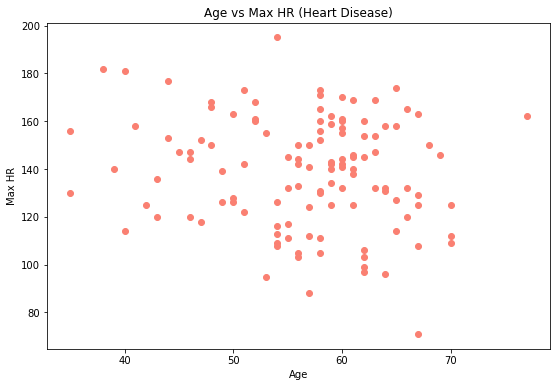

In [17]:
positive_disease = df.loc[df['Heart Disease']==1] 
plt.figure(figsize=(9,6))
plt.scatter(positive_disease["Age"],
            positive_disease["Max HR"],
            color="salmon"
           )
plt.title("Age vs Max HR (Heart Disease)")
plt.xlabel("Age")
plt.ylabel("Max HR")

Text(0, 0.5, 'Max HR')

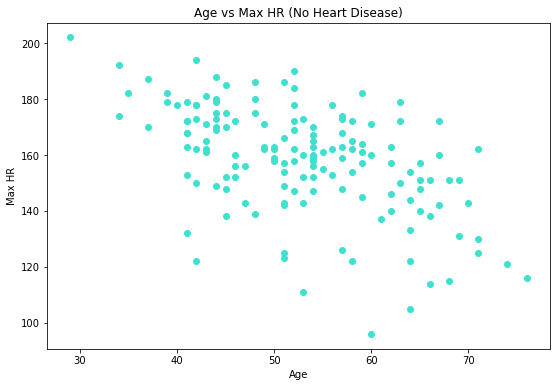

In [18]:
positive_disease = df.loc[df['Heart Disease']==0] 
plt.figure(figsize=(9,6))
plt.scatter(positive_disease["Age"],
            positive_disease["Max HR"],
            color="turquoise"
           )
plt.title("Age vs Max HR (No Heart Disease)")
plt.xlabel("Age")
plt.ylabel("Max HR")

Text(0.5, 1.0, 'Age spread')

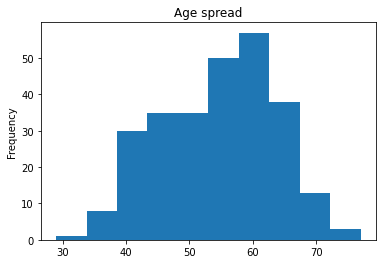

In [19]:
#age distribution
df["Age"].plot.hist()
plt.title("Age spread")

## Chest Pain Type vs Heart Disease Frequency


In [20]:
pd.crosstab(df["Chest pain type"], df["Heart Disease"])

Heart Disease     0   1
Chest pain type        
1                15   5
2                35   7
3                62  17
4                38  91

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

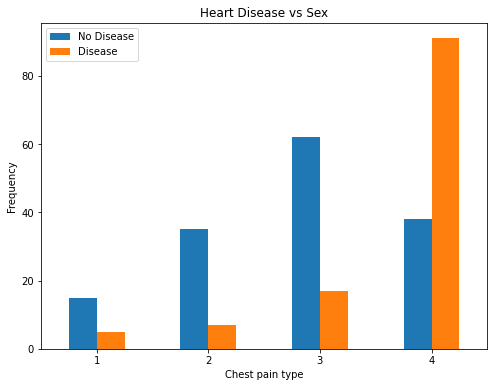

In [21]:
pd.crosstab(df["Chest pain type"],df["Heart Disease"]).plot(kind="bar",
                                                figsize=(8,6),)

plt.title("Heart Disease vs Sex")
plt.xlabel("Chest pain type")
plt.ylabel("Frequency")
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0)

## General Variable Correlations 

In [22]:
df.corr() #correlation matrix

Age       Sex  Chest pain type        BP  \
Age                      1.000000 -0.094401         0.096920  0.273053   
Sex                     -0.094401  1.000000         0.034636 -0.062693   
Chest pain type          0.096920  0.034636         1.000000 -0.043196   
BP                       0.273053 -0.062693        -0.043196  1.000000   
Cholesterol              0.220056 -0.201647         0.090465  0.173019   
FBS over 120             0.123458  0.042140        -0.098537  0.155681   
EKG results              0.128171  0.039253         0.074325  0.116157   
Max HR                  -0.402215 -0.076101        -0.317682 -0.039136   
Exercise angina          0.098297  0.180022         0.353160  0.082793   
ST depression            0.194234  0.097412         0.167244  0.222800   
Slope of ST              0.159774  0.050545         0.136900  0.142472   
Number of vessels fluro  0.356081  0.086830         0.225890  0.085697   
Thallium                 0.106100  0.391046         0.262659  0.132045   
Heart Disease            0.212322  0.297721         0.417436  0.155383   

                         Cholesterol  FBS over 120  EKG results    Max HR  \
Age                         0.220056      0.123458     0.128171 -0.402215   
Sex                        -0.201647      0.042140     0.039253 -0.076101   
Chest pain type             0.090465     -0.098537     0.074325 -0.317682   
BP                          0.173019      0.155681     0.116157 -0.039136   
Cholesterol                 1.000000      0.025186     0.167652 -0.018739   
FBS over 120                0.025186      1.000000     0.053499  0.022494   
EKG results                 0.167652      0.053499     1.000000 -0.074628   
Max HR                     -0.018739      0.022494    -0.074628  1.000000   
Exercise angina             0.078243     -0.004107     0.095098 -0.380719   
ST depression               0.027709     -0.025538     0.120034 -0.349045   
Slope of ST                -0.005755      0.044076     0.160614 -0.386847   
Number of vessels fluro     0.126541      0.123774     0.114368 -0.265333   
Thallium                    0.028836      0.049237     0.007337 -0.253397   
Heart Disease               0.118021     -0.016319     0.182091 -0.418514   

                         Exercise angina  ST depression  Slope of ST  \
Age                             0.098297       0.194234     0.159774   
Sex                             0.180022       0.097412     0.050545   
Chest pain type                 0.353160       0.167244     0.136900   
BP                              0.082793       0.222800     0.142472   
Cholesterol                     0.078243       0.027709    -0.005755   
FBS over 120                   -0.004107      -0.025538     0.044076   
EKG results                     0.095098       0.120034     0.160614   
Max HR                         -0.380719      -0.349045    -0.386847   
Exercise angina                 1.000000       0.274672     0.255908   
ST depression                   0.274672       1.000000     0.609712   
Slope of ST                     0.255908       0.609712     1.000000   
Number of vessels fluro         0.153347       0.255005     0.109498   
Thallium                        0.321449       0.324333     0.283678   
Heart Disease                   0.419303       0.417967     0.337616   

                         Number of vessels fluro  Thallium  Heart Disease  
Age                                     0.356081  0.106100       0.212322  
Sex                                     0.086830  0.391046       0.297721  
Chest pain type                         0.225890  0.262659       0.417436  
BP                                      0.085697  0.132045       0.155383  
Cholesterol                             0.126541  0.028836       0.118021  
FBS over 120                            0.123774  0.049237      -0.016319  
EKG results                             0.114368  0.007337       0.182091  
Max HR                                 -0.265333 -0.253397      -0.418514 

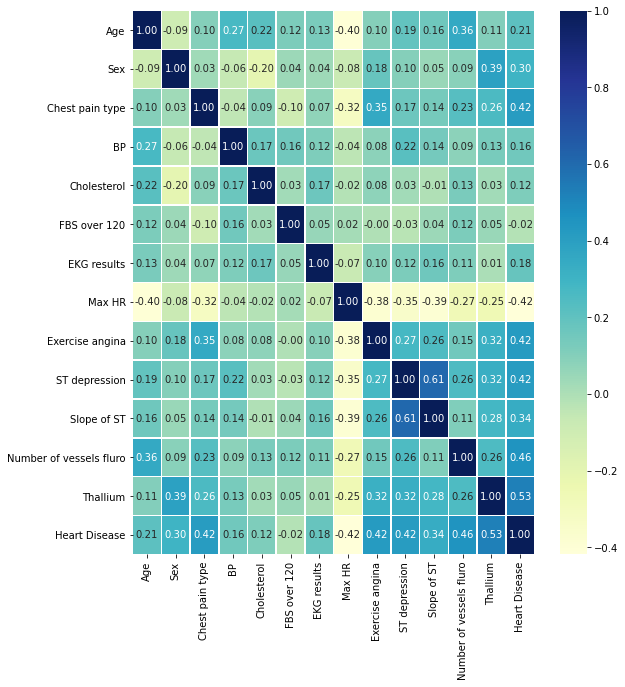

In [23]:
corr_matrix = df.corr() #magnitude = more correlated positively/negatively
fig,ax = plt.subplots(figsize=(9,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom+0.5,top-0.5)

## Modelling

In [24]:
df.head()

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium  Heart Disease  
0                        3         3              1  
1                        0         7              0  
2                        0         7              1  
3                        1         7              0  
4                        1         3              0

In [25]:
#split X and y
X = df.drop("Heart Disease", axis=1)
y = df["Heart Disease"]


In [26]:
X

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope of ST  \
0       109                0            2.4            2   
1       160                0            1.6            2   
2       141                0            0.3            1   
3       105                1            0.2            2   
4       121                1            0.2            1   
..      ...              ...            ...          ...   
265     162                0            0.5            1   
266     173                0            0.0            1   
267     153                0            1.3            2   
268     148                0            0.4            2   
269     108                1            1.5            2   

     Number of vessels fluro  Thallium  
0                          3         3  
1                          0         7  
2                          0         7  
3                          1         7  
4                          1         3  
..                       ...       ...  
265                        0         7  
266                        0         7  
267                        0         3  
268                        0         6  
269                        3         3  

[270 rows x 13 columns]

In [27]:
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int64

In [28]:
#split -> train/test sets
np.random.seed(33)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
len(X_train), len(X_test), len(df)

(216, 54, 270)

## Model Comparison

In [30]:
#3 models will be tested
# a) logistic regression
# b) k-nearest neighbours
# c) random forest classifier

models = {
            "Logistic Regression": LogisticRegression(max_iter=1000),
            "KNN": KNeighborsClassifier(),
            "Random Forest": RandomForestClassifier()
         }

#scoring of models
def score(model,X_train,X_test,y_train,y_test):
    np.random.seed(33)
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [31]:
scores = []

for model in models: 
    model_score = score(models[model],X_train,X_test,y_train,y_test)*100
    scores += [model_score]
    print(f'{model}: {round(model_score,2)}%')

Logistic Regression: 87.04%
KNN: 53.7%
Random Forest: 81.48%


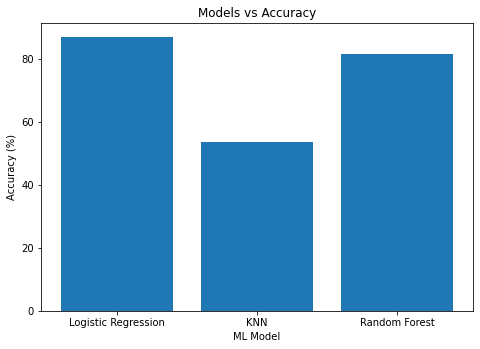

In [32]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(models.keys(),scores)
plt.title("Models vs Accuracy")
plt.xlabel("ML Model")
plt.ylabel("Accuracy (%)")
plt.show()

## Hyperparameter Tuning (via Hand)

In [33]:
#KNN
train_scores = []
test_scores = []

for i in range(1,50):
    models["KNN"].set_params(n_neighbors=i)
    train_scores += [score(models["KNN"],X_train,X_train,y_train,y_train)*100]
    test_scores += [score(models["KNN"],X_train,X_test,y_train,y_test)*100]

In [34]:
train_scores[:5]

[100.0,
 81.48148148148148,
 82.4074074074074,
 78.24074074074075,
 80.55555555555556]

In [35]:
test_scores[:5]

[48.148148148148145, 50.0, 50.0, 48.148148148148145, 53.70370370370371]

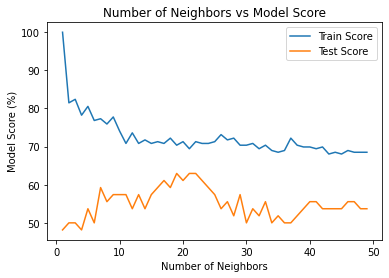

In [36]:
plt.plot(range(1,50),train_scores,label="Train Score")
plt.plot(range(1,50),test_scores,label="Test Score")
plt.title("Number of Neighbors vs Model Score")
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score (%)")
plt.legend()

In [37]:
print(f'max test score: {max(test_scores)}%')

max test score: 62.96296296296296%


## Hyperparameter Tuning (via RandomSearch)

In [38]:
#Logistic regression hyperparam grid
logistic_grid = {
    "C": np.logspace(-4,4,20), #even spacing on a logarithmic scale
    "solver": ["liblinear"]
}

#Random forest hyperparam grid
rf_grid = {
    "n_estimators": np.arange(10,1000,50),
    "max_depth": [None,3,5,10],
    "min_samples_split": np.arange(2,20,2),
    "min_samples_leaf": np.arange(1,20,2)
}

In [39]:
#Logistic regression search
np.random.seed(33)

rs_logistic = RandomizedSearchCV(models["Logistic Regression"],
                                 param_distributions=logistic_grid,
                                 cv=5,
                                 n_iter=20,
                                 verbose=True
                                )

rs_logistic.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [40]:
rs_logistic.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [41]:
models["Logistic Regression"].set_params(solver="liblinear",C=0.615848211066026)
score(models["Logistic Regression"],X_train,X_train,y_train,y_train)*100

85.18518518518519

In [42]:
#Random Forest search
np.random.seed(33)

rs_rf = RandomizedSearchCV(models["Random Forest"],
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True
                          )

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [43]:
rs_rf.best_params_

{'n_estimators': 360,
 'min_samples_split': 14,
 'min_samples_leaf': 19,
 'max_depth': None}

In [44]:
models["Random Forest"].set_params(n_estimators=360,
                                   min_samples_split=14,
                                   min_samples_leaf=19,
                                   max_depth=None)
score(models["Random Forest"],X_train,X_train,y_train,y_train)*100

87.96296296296296

## Hyperparameter Tuning (via GridSearch)

LogisticRegression will be further tuned due to stable accuracy it has produced

In [66]:
logistic_grid = {
    "C": np.logspace(-4,4,30), 
    "solver": ["liblinear","lbfgs"],
    'max_iter': [10000],
}

gs_logistic = GridSearchCV(models["Logistic Regression"],
                           param_grid=logistic_grid,
                           cv=5,
                           verbose=True
                          )

gs_logistic.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(C=0.49238826317067363, max_iter=1000,
                                          solver='liblinear'),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'max_iter': [10000],
                         'solver': ['liblinear', 'lbfgs']},
             verbose=True)

In [67]:
gs_logistic.best_params_

{'C': 0.20433597178569418, 'max_iter': 10000, 'solver': 'lbfgs'}

In [68]:
models["Logistic Regression"].set_params(solver="lbfgs",C=0.20433597178569418,max_iter=10000)
score(models["Logistic Regression"],X_train,X_train,y_train,y_train)*100

86.11111111111111

## Evaluation of Model (Logistic Regression)

In [69]:
y_preds = models["Logistic Regression"].predict(X_test)

In [70]:
y_preds[:5]

array([0, 1, 0, 0, 1], dtype=int64)

In [71]:
y_test[:5]

169    1
237    1
268    0
167    0
249    1
Name: Heart Disease, dtype: int64

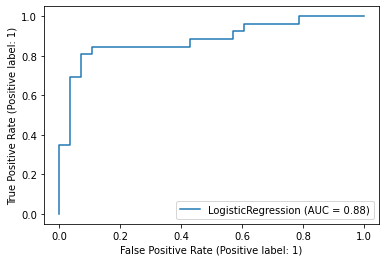

In [73]:
#ROC curve + AUC score
plot_roc_curve(models["Logistic Regression"],X_test,y_test)

In [75]:
#Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[25  3]
 [ 4 22]]


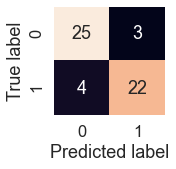

In [77]:
sns.set(font_scale=1.5) # Increase font size
 
def show_matrix(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(2, 2))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, #
                     cbar=False)
    plt.xlabel("Predicted label") 
    plt.ylabel("True label") 
    
show_matrix(y_test, y_preds)